## Works in Colab

This cell works in Colab and compiles the animation after generating all the frames, so it will be slower for longer animations.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc, colors

N = 40
ant = np.array([N//2, N//2])
move = {'N': [0, 1], 'E': [1, 0], 'S': [0, -1], 'W': [-1, 0]}
d = ['N', 'E', 'S', 'W']
facing = 1
board = np.zeros((N, N))
color = 0
board[ant[0]][ant[1]] = 4

cmap = colors.ListedColormap(['darkgreen', 'limegreen', 'greenyellow', 'yellow', 'red'])


def turn(direction):
    if direction == 'R':
        return (facing + 1) % 4
    else:
        return (facing - 1) % 4


def update(data):
    global ant, board, facing, color
    if color in [0, 1]:
        facing = turn('R')
    else:
        facing = turn('L')

    board[ant[0]][ant[1]] = (color + 1) % 4
    ant += move[str(d[facing])]
    color = board[ant[0]][ant[1]]
    board[ant[0]][ant[1]] = 4

    mat.set_data(board)
    return [mat]

fig, ax = plt.subplots(figsize=(5, 5));
ax.grid(False)
plt.axis('off')
plt.close()

mat = ax.matshow(board, cmap=cmap)
ani = animation.FuncAnimation(fig, update, frames = 50, interval = 10, repeat=False, blit=True)

rc('animation', html='jshtml')
ani

## Works in Jupyter

This cell works in Jupyter and will autoredraw frames in real time, so it can run forever, but the redraw rate can't be sped up.

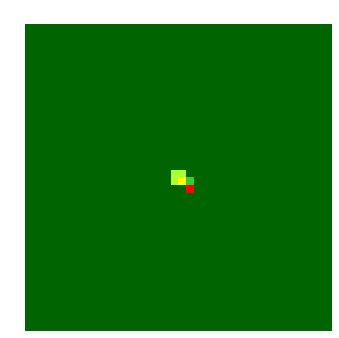

In [2]:
import numpy as np
from IPython import display
from matplotlib import colors
import matplotlib.pyplot as plt

N = 40
ant = np.array([N//2, N//2])
move = {'N': [0, 1], 'E': [1, 0], 'S': [0, -1], 'W': [-1, 0]}
d = ['N', 'E', 'S', 'W']
facing = 1
board = np.zeros((N, N))
color = 0
board[ant[0]][ant[1]] = 4

cmap = colors.ListedColormap(['darkgreen', 'limegreen', 'greenyellow', 'yellow', 'red'])

def turn(direction):
    if direction == 'R':
        return (facing + 1) % 4
    else:
        return (facing - 1) % 4


for i in range(10):
    if color in [0, 1]:
        facing = turn('R')
    else:
        facing = turn('L')

    board[ant[0]][ant[1]] = (color + 1) % 4
    ant += move[str(d[facing])]
    color = board[ant[0]][ant[1]]
    board[ant[0]][ant[1]] = 4
    
    plt.matshow(board, cmap=cmap)
    display.clear_output(wait=True)
    plt.grid(False)
    plt.axis('off')
    
    display.display(plt.gcf())
    
    plt.close()

In [82]:
# !pip install wordcloud

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from google.colab import files


words = files.upload()
image = files.upload()

Saving lambda.jpg to lambda (5).jpg


(-0.5, 399.5, 199.5, -0.5)

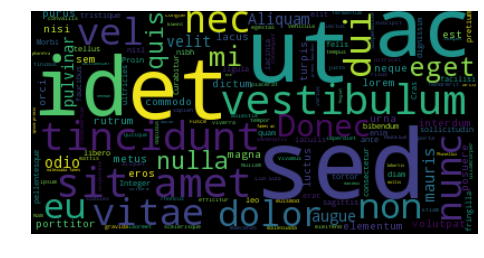

In [74]:
words = words['words.txt'].decode('utf-8')

wordcloud = WordCloud().generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

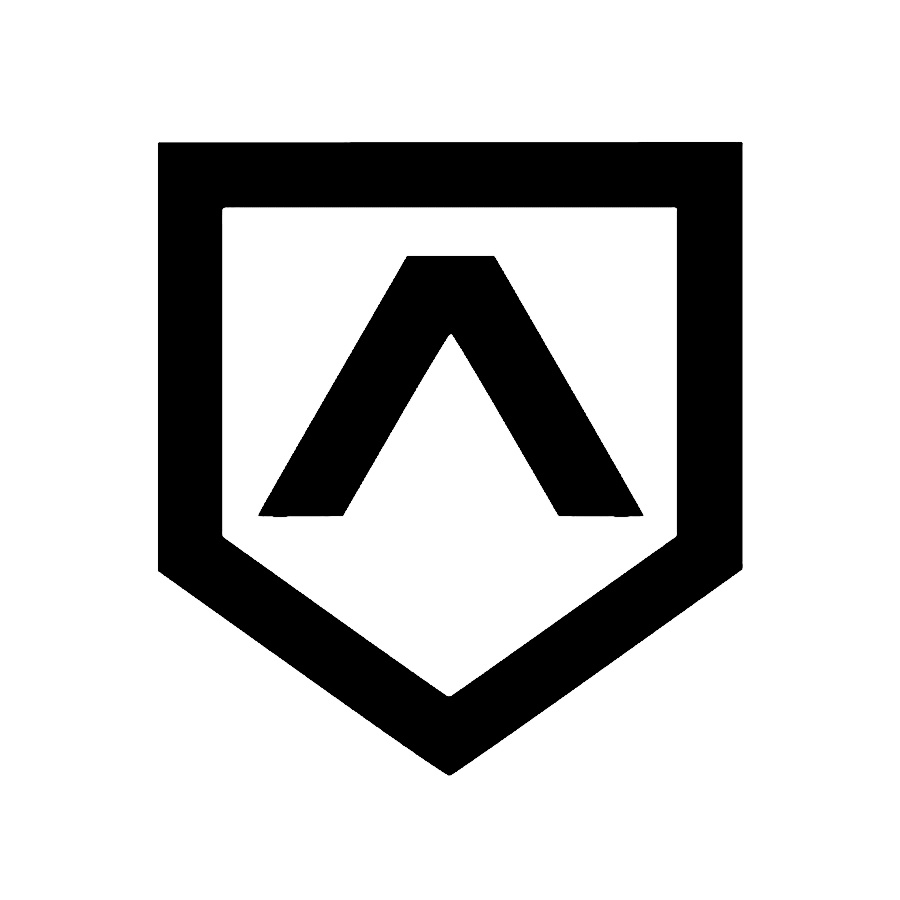

In [83]:
from io import BytesIO
im = Image.open(BytesIO(image['lambda.jpg']))
im

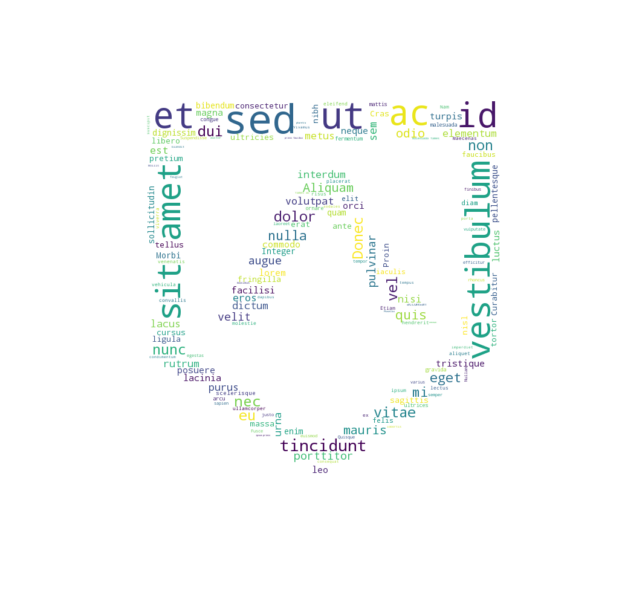

In [86]:
# create mask
alice_mask = np.array(Image.open(BytesIO(image['lambda.jpg'])))

# remove stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")

# generate word cloud
wc = WordCloud(background_color="white", mask=alice_mask, stopwords=stopwords)
wc.generate(words)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


Redirecting output to ‘wget-log’.


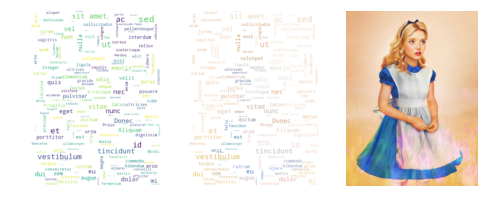

In [90]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = words

!wget https://orig00.deviantart.net/d189/f/2012/029/e/0/e0f057b7a1a61de962d89347b6d7201f-d4o1tzm.jpg

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "e0f057b7a1a61de962d89347b6d7201f-d4o1tzm.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()